# Workshop 4: How can we slow the spread of antimicrobial resistance?

In Workshop 3 you explored a model for the spread of antimicrobial resistance in a hospital and wrote a function to allocate antibiotics within the hospital. Your goal in that workshop was to allocate antibiotics to patients in such a way that the evolution of AMR was slowed and deaths among patients minimised. In this workshop we will build upon what you did last week to further understand how we can slow the spread of AMR.

Firstly, you will be given some example functions for allocating antibiotics in the model. However, you will not be given any information about what these functions do other than being given the code. Your task will be to write a description of how what these functions are doing.

Secondly, you will compare the performance of these functions to each other and to the function that you devised last week. You will also examine how different parameters affect the relative performance of each function, and explain why each function is best.


#### Intended Learning Outcomes

By the end of this workshop, you should be able to:

* Write an explanation of supplied function code
* Compare function behaviour across a range of paramter values using loops
* Understand how using multiple drugs can help slow resistance evolution and reduce deaths


### Working as a group

Your task today is as much conceptual as a coding task. **Discuss your code, ideas and answers with other members of the group.** Peer assistance (not copying answers but talking through your approaches to the problem) can help avoid you getting stuck, increase how much you learn from the session and make it more enjoyable.





# Importing and looping the model

Here is a quick reminder of how our model works:
* In the model there are two different antibiotics that can be used by doctors in the hospital, drug A and drug B.
* The bacteria can have four different types:
    1. Sensitive to both antibiotics (`sensitive`)
    2. Resistant to drug A and sensitive to drug B (`resistant_A`)
    3. Resistant to drug B and sensitive to drug A (`resistant_B`)
    4. Resistant to both drugs (`resistant_AB`).
* Drug A is better at killing the bacteria, helping patients clear their infection twice as fast as drug B when the infecting bacteria are sensitive to it (efficacy drug A = 0.01, effiacy drug B = 0.005).
* Both drugs carry a cost of resistance for the bacteria.
* The infection is potentially lethal, with each infected patient having a 1% chance of dying each day.
* The model will simulate 5,000 days every time that you run it.
* Each simulation will begin with only sensitive bacteria, but resistance to both drugs will begin to appear by mutation.
* How fast resistance to each drug will spread will depend on how antibiotics are allocated during the simulation.

Today we will import a slightly different version of the model which will allow you to pass the model values for the parameters of the efficacies of drug A and drug B and the cost of resistance. This will allow you to explore how these parameters effect the outcome of the models.

To get started we'll load the module `AMR_model` that contains the model along with some other modules that we'll need today.

In [1]:
import AMR_model_vary_pars as model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

As before this module contains a function called `run_model`, which will run the computer simulation of the spread of resistance in the hospital. This `run_model` function takes **three inputs**: 
   1. The allocation function to be used
   2. The cost of resistance(`cost`)
   3. The probability of a resistance mutation occurring per infection per day (`mutation`)
   
As with last week, you are given **5 inputs** which must be passed to your allocation function. These are:
   1. The current day of the simulation (`day`)
   2. The prevalence of infections that are sensitive to both antibiotics (`sensitive`)
   3. The prevalence of infections that are resistant to drug A and sensitive to drug B (`resistant_A`)
   4. The prevalence of infections that are resistant to drug B and sensitive to drug A (`resistant_B`)
   5. The prevalence of infections that are resistant to both drugs (`resistant_AB`)
   
Prevalence here is the proportion of patients with that infection.

**Again remember that `pA` and `pB` must not add up to greater than 1. Otherwise the model will simply not treat any patients at all, so be careful to ensure that this is always the case!**

Let's use our `use_the_bad_drug` allocation function from last week to see how the `run_model` function works.

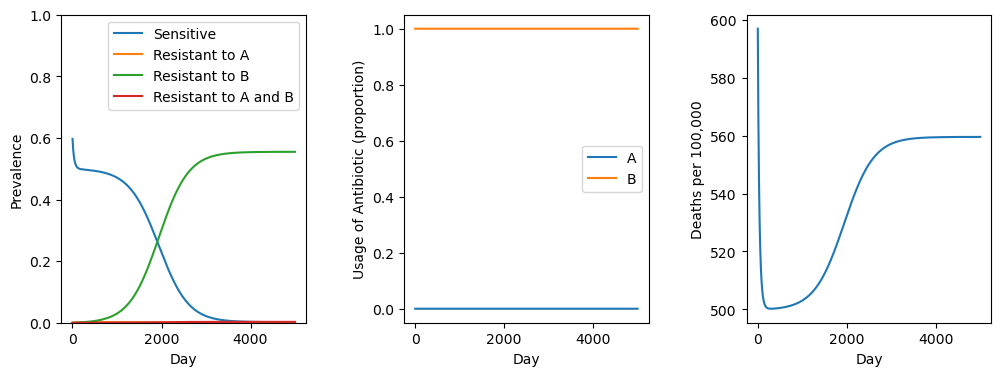

2684745.377195497

In [6]:
# define the allocation function
def use_the_bad_drug(day,sensitive,resistant_A,resistant_B,resistant_AB):
    pA=0
    pB=1
    return(pA,pB)


results = model.run_model(use_the_bad_drug,cost=0.002,mutation=0.00001) # run the model


fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)
plt.plot("day", "sensitive",data=results)
plt.plot("day", "resistant_A",data=results)
plt.plot("day", "resistant_B",data=results)
plt.plot("day", "resistant_AB",data=results)
plt.ylim((0, 1))
plt.xlabel('Day')
plt.ylabel('Prevalence')
plt.legend(['Sensitive', 'Resistant to A', 'Resistant to B', 'Resistant to A and B'])
ax2 = fig.add_subplot(132)
plt.plot("day", "usage_A",data=results)
plt.plot("day", "usage_B",data=results)
plt.xlabel('Day')
plt.ylabel('Usage of Antibiotic (proportion)')
plt.legend(['A', 'B'])
average_deaths=np.mean(results.deaths)
ax3 = fig.add_subplot(133)
plt.plot("day", "deaths",data=results)
plt.xlabel('Day')
plt.ylabel('Deaths per 100,000')
plt.subplots_adjust(wspace=0.4)
plt.show()

sum(results.deaths)

Here we have run the model as last week, but we are now passing the function values for the parameters `cost` and `mutation`, which it will use for that model run. This allows us to use a for loop to loop our model across parameter values to explore its behaviour (**Note**:You also used for loops in the week 1 workshop). Let's look at an example now by looping the model across different values of the cost of resistance.

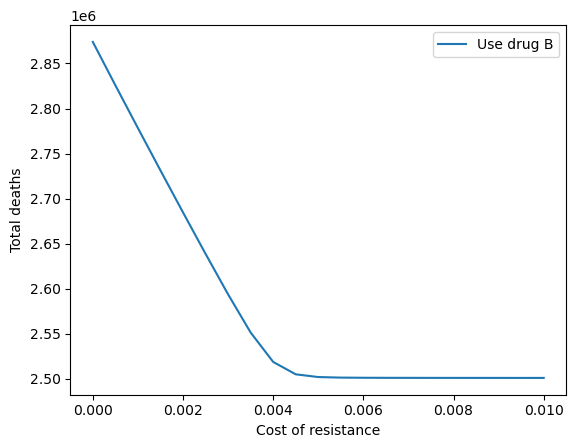

In [7]:
cost_values = np.arange(0, 0.0105, 0.0005).tolist() # list of cost values to use


death_results1=list() # empty list for death results

# loop across the cost values
for cost in cost_values:
    results = model.run_model(use_the_bad_drug,cost=cost,mutation=0.00001) # run the model
    death_results1.append(sum(results.deaths)) # sum deaths and add it to the results list

# plot total deaths as a function of the cost of resistance
plt.plot(cost_values, death_results1)
plt.xlabel('Cost of resistance')
plt.ylabel('Total deaths')
plt.legend(['Use drug B']);

We see here that an increased cost of resistance reduces the number of deaths in the model as this will slow the evolution of resistance. However, above a cost value of 0.005 there is no further decline in deaths. This makes sense as the efficacy of drug B is 0.005, so at this point the cost of resistance completely cancels out the benefit of resistance, so resistance never evolves when the cost is greater than 0.005. We can see this by comparing the dynamics of the model when 

# Task 1 – Describing functions

Below you are given three functions for allocating antibiotics in the hospital. Simply from the function code write what you think each function does, as well as what you think the logic is for why this might help save patients, in the text cell below the function code. You can insert extra cells to run the model with the function and plot the function behaviour if this will help you decipher the code. You can also use google, stackoverflow, etc. to help with any aspects of the code that you don't understand.

In [ ]:
def function1(day,sensitive,resistant_A,resistant_B,resistant_AB):
    pA=2/3
    pB=1/3
    return(pA,pB)


Double click on this text box. Add your explanation for function1 here and what the logic is for why it might help save patients.

In [ ]:
import math
def function2(day,sensitive,resistant_A,resistant_B,resistant_AB):
    if (math.ceil(day/60)%2==0):
        pA=1
        pB=0
    else:
        pA=0
        pB=1
    return(pA,pB)


Double click on this text box. Add your explanation for function2 here and what the logic is for why it might help save patients.

In [ ]:
def function3(day,sensitive,resistant_A,resistant_B,resistant_AB):
    if ((sensitive+resistant_A) < 2*(sensitive+resistant_B)):
        pA=1
        pB=0
    else:
        pA=0
        pB=1
    return(pA,pB)


Double click on this text box. Add your explanation for function3 here and what the logic is for why it might help save patients.

# Task 2 – Comparing to your function

You've been given 3 allocation functions above. Now make some plots comparing the deaths with your allocation function that you devised last week to these allocation functions. First plot the total deaths for each function against a varying cost of resistance (i.e. four different coloured lines, one for each allocation function, x-axis is cost of resistance, y-axis is total deaths, example of what you are trying to achieve show below). Second, plot the total deaths for each function against a varying probability of mutation (i.e. four different coloured lines, one for each allocation function, x-axis is mutation probability, y-axis is total deaths).

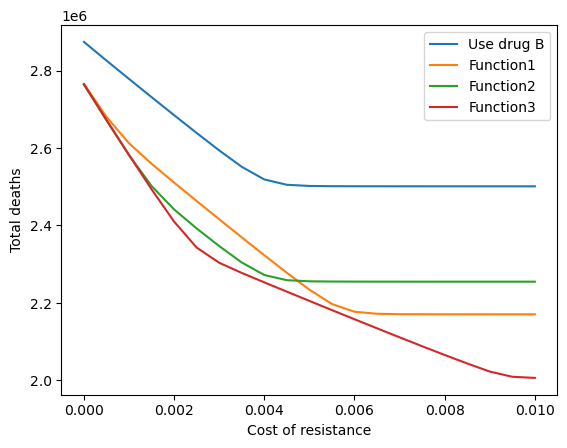

Once you have made these plots, explain why you think your allocation function from last week performed better or worse than the allocation functions supplied here. You can use the text box below to enter your explanation.

Double click on this text box. Add your explanation here for why your allocation function from last week performed better or worse than the allocation functions supplied today.

# Task 3 – Write up for your paper
For you paper submission you will need to write 300 words on "Explain how you would use a newly discovered antibiotic in a way that minimises the speed at which resistance to it evolves and saves as many patients as possible”. You will also need to choose a figure from what you did in the last two workshops that shows some results supporting this strategy. You can access this by clicking "Discover Workbook" on the course Learn page, follwed by the Paper Submission tab. You should begin work on this now and you can always edit it further before the submission date